# Importing Libraries

In [1]:
!pip install inflection

In [2]:
import pandas as pd
import numpy as np

# formatting
import inflection

#plotting
from matplotlib import pyplot as plt
import seaborn as sns

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler

# oversampling
from imblearn.over_sampling import SMOTE

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from hyperopt import hp, tpe, fmin, Trials

import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress FutureWarning and DataConversionWarning
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
# Dataset loading
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.isnull().sum()
# No null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Removing irrelevant column
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# renaming the column to snake_case format

column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data.columns = column_list
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Seperating numerical and catogerical data

# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

data_type_general = dict()

for col in data.columns:
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


In [10]:
# Datatype of all column
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


In [11]:
# data in total charge should be numeric intead of object
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce') # errors = coerce for filling invalid values as nan
data['total_charges'].isna().sum()

11

In [12]:
# Filling nan with 0
data.fillna({'total_charges':0},inplace = True)
data['total_charges'].isna().sum()

0

In [13]:
data['total_charges'] = data['total_charges'].astype(float)
data.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [14]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


# Data Variance for numerical and catogorical column

In [15]:
# For numerical 
variation_numerical = dict()

for col in column_numerical:
  tmp = f'{data[col].min()} - {data[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

,tenure,monthly_charges,total_charges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


In [16]:
# For categorical
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


In [17]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


Overall Data Variance

Replacing Redundtant values 

In [18]:
# replace redundant values
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

In [19]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


 # Summary of the dataset 

In [20]:
data_info = pd.concat([data_type_general, data_type_python,
                     data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


# EDA

In [21]:
column_categorical.remove('churn')

In [22]:
df = data.copy()
df.loc[:,'churn'] = df.loc[:, 'churn'].apply(lambda x: 'churn' if x == 'Yes' else 'retain')

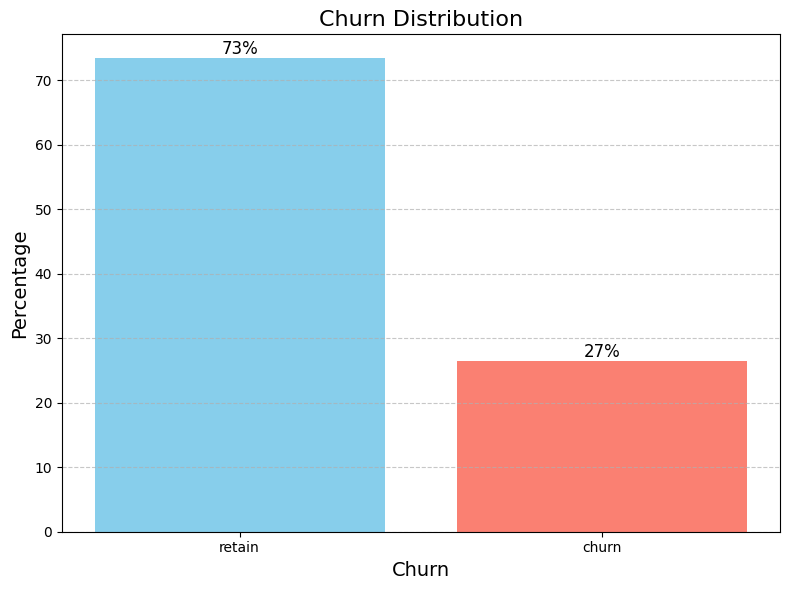

In [36]:
# Data for the bar plot
bar_data = df['churn'].value_counts(normalize=True)
bar_labels = df['churn'].value_counts(normalize=True).index.to_list()

# Bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(bar_labels, bar_data * 100, color=['skyblue', 'salmon'])

# Add labels and percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', ha='center', va='bottom', fontsize=12)

# Set plot properties
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Churn Distribution', fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Dataset is imbalanced as it contains 27% , 73% churn and retain values.
For this problem we can use method of synthetic data generation like SMOTE

/tmp/ipykernel_34/4276473852.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


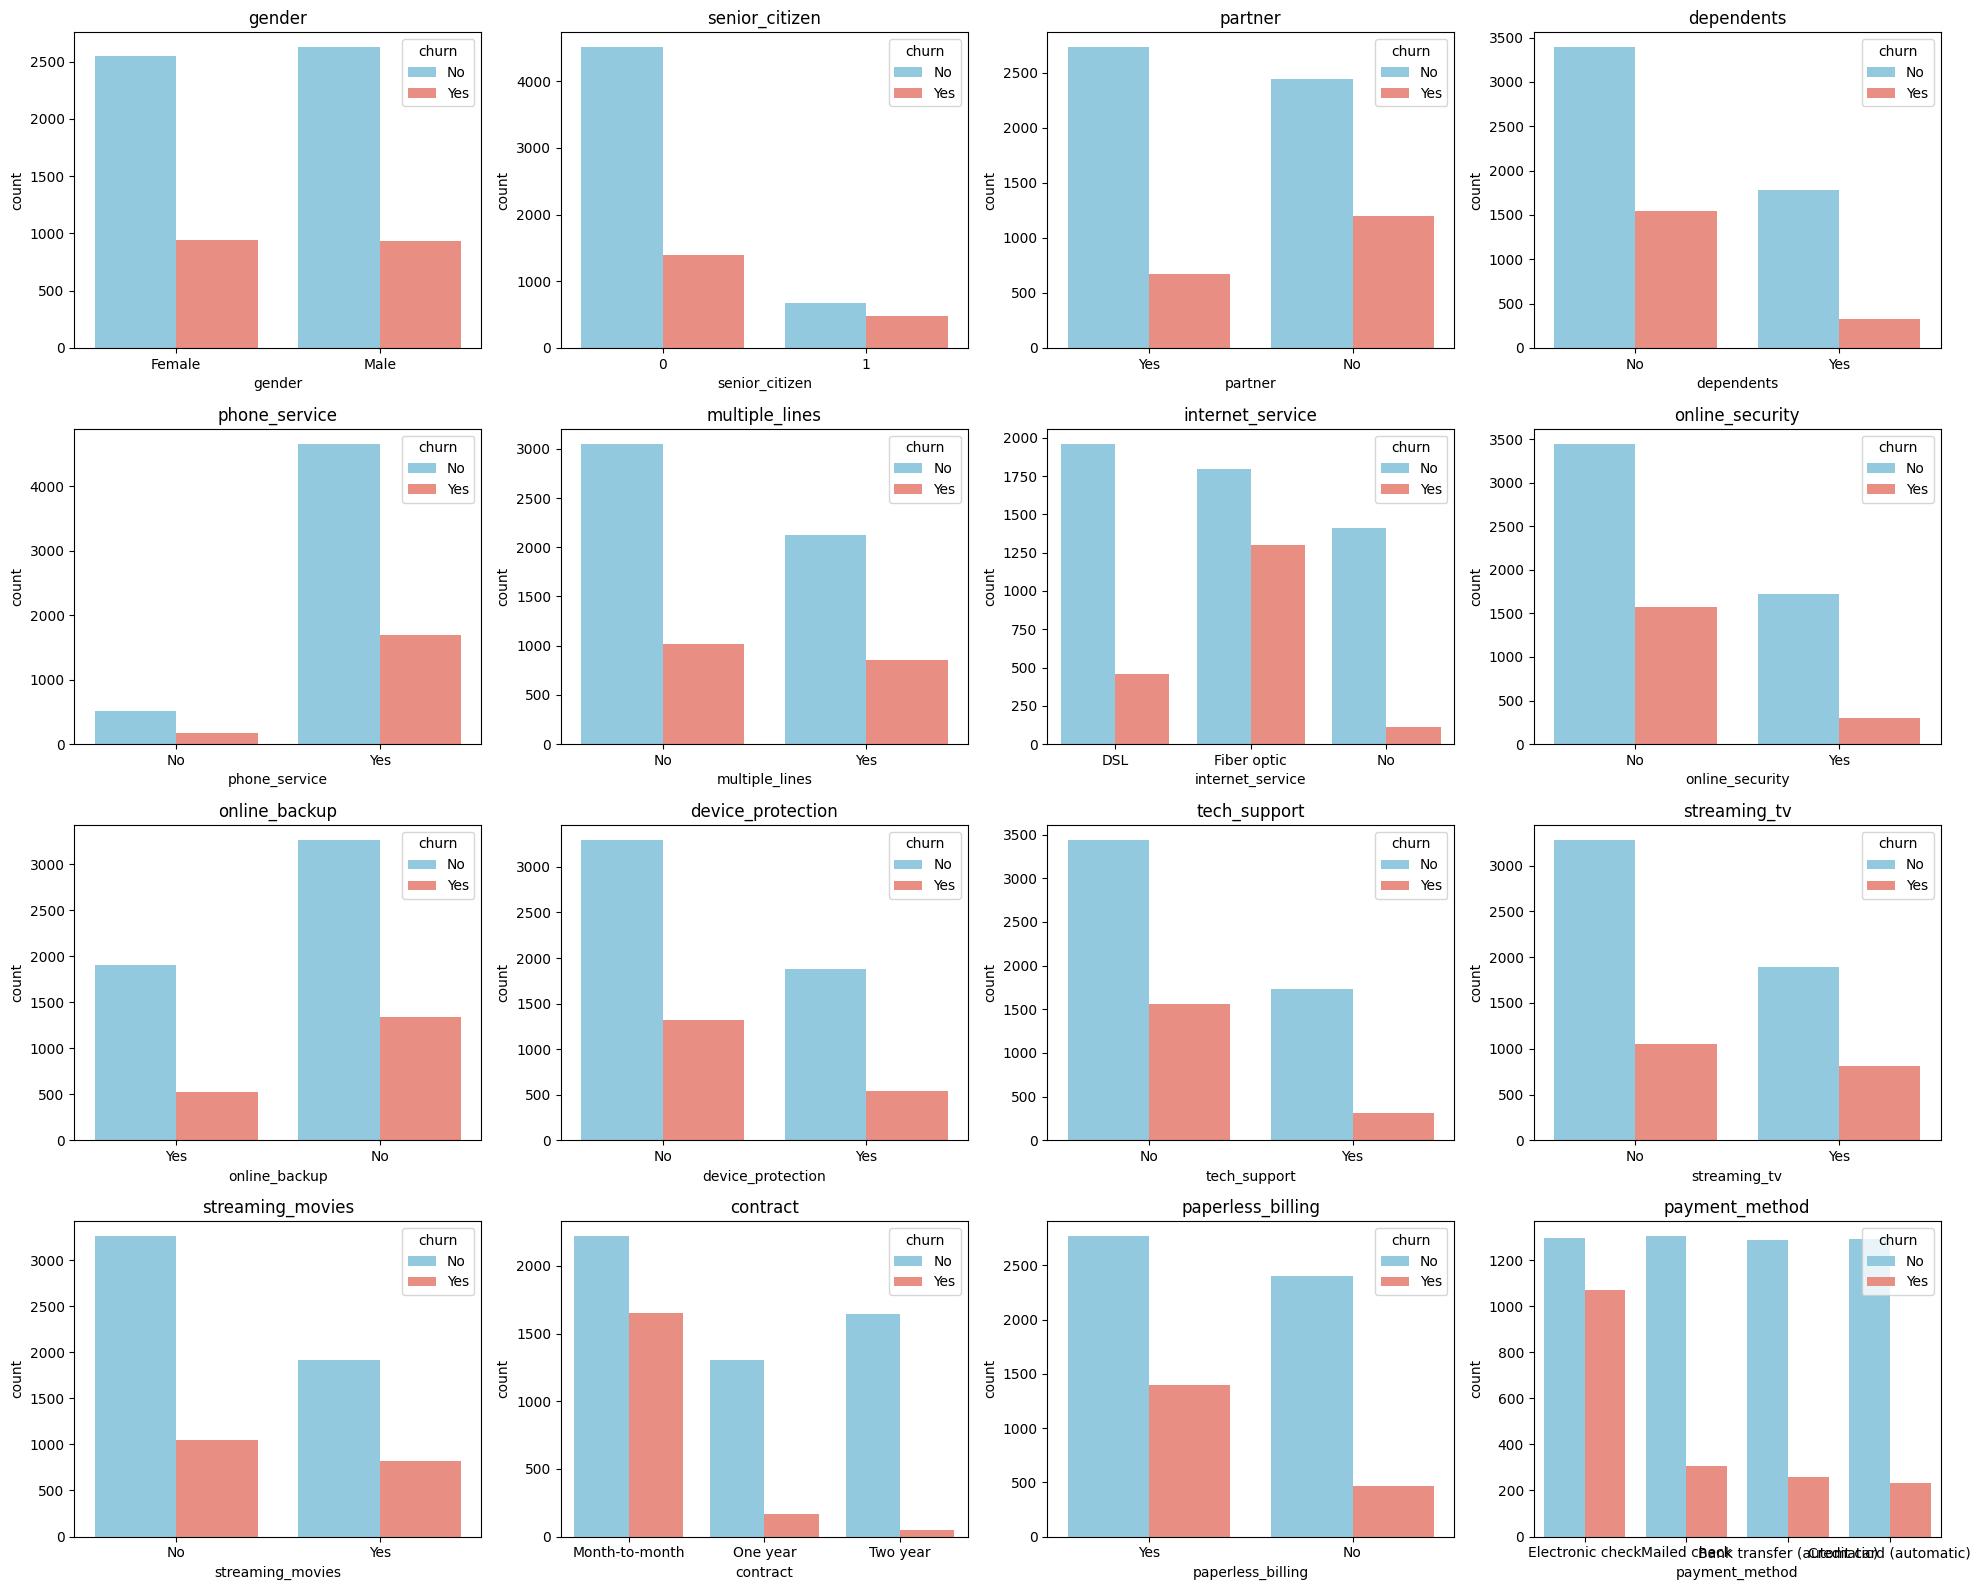

In [27]:
fig, axes = plt.subplots(4, 4, figsize=(20, 16), constrained_layout=True)

# Iterate over predictors and plot each one
for i, predictor in enumerate(data.drop(columns=['churn', 'total_charges', 'monthly_charges', 'tenure'])):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.countplot(data=data, x=predictor, hue='churn', ax=ax, palette=['skyblue', 'salmon'])
    ax.set_title(predictor)

plt.tight_layout()
plt.show()

Both male and female have the same number of churn , Therefore it can be concluded that customer's gender doesn't have strong relationship with churn status

Senior citizen have high chances of churn

# Top 5 attribute and it's value with highest churn probability

In [29]:
columns = df['churn']

attr_crosstab = pd.DataFrame()

for col in column_categorical:
  # create crosstab for each attribute
  index = df[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,churn,retain
0,Payment Method (Electronic check),0.452854,0.547146
1,Contract (Month-to-month),0.427097,0.572903
2,Internet Service (Fiber optic),0.418928,0.581072
3,Senior Citizen (1),0.416813,0.583187
4,Paperless Billing (Yes),0.335651,0.664349
5,Partner (No),0.329580,0.670420
6,Online Security (No),0.313296,0.686704
7,Dependents (No),0.312791,0.687209
8,Tech Support (No),0.311862,0.688138
9,Streaming Tv (Yes),0.300702,0.699298


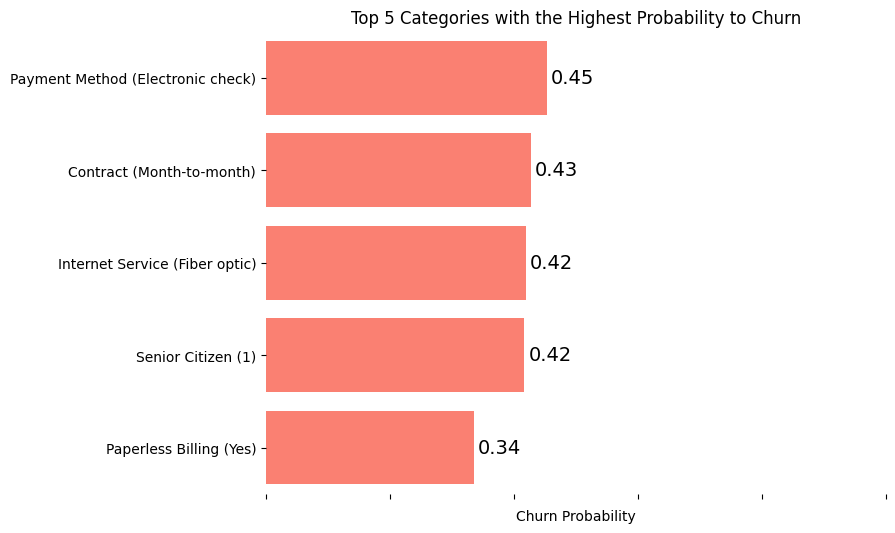

In [37]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[:5], x='churn', y='attribute', ax=ax, palette=['salmon'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

# Top 5 attribute and it's value with lowest churn probability

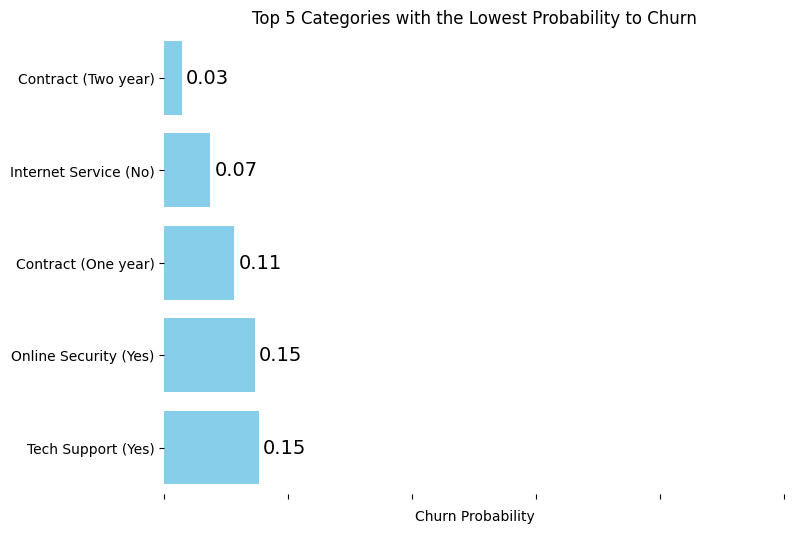

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('churn'), x='churn', y='attribute', ax=ax, palette=['skyblue'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

Churn probability for numerical data


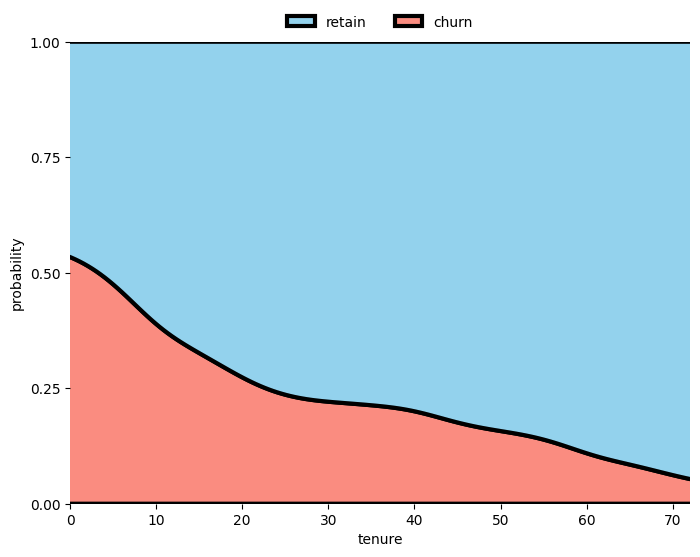

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')

# palette colors
palette = ['skyblue', 'salmon']

# Plot the KDE plot
sns.kdeplot(data=df, x='tenure', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9, palette=palette)

# Move the legend
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0, df['tenure'].max(), 10))
ax.set_xlim(df['tenure'].min(), df['tenure'].max())

ax.set_yticks(np.linspace(0, 1, 5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

plt.show()

It is clearly a time series trend , with a negative correlation of tenure with probability of churn



Churn probability by monthly charges

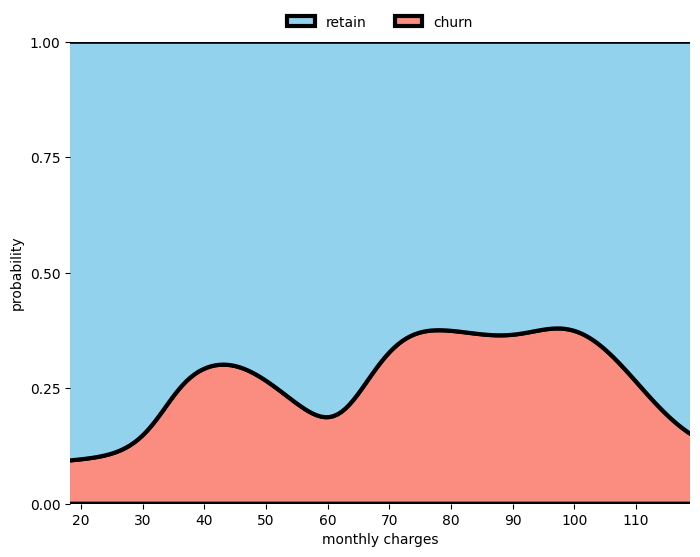

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=df, x='monthly_charges', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9,palette=palette)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,df['monthly_charges'].max(),10))
ax.set_xlim(df['monthly_charges'].min(),df['monthly_charges'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')
ax.set_xlabel('monthly charges')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

It has no clear trend

# Numerical data distribution

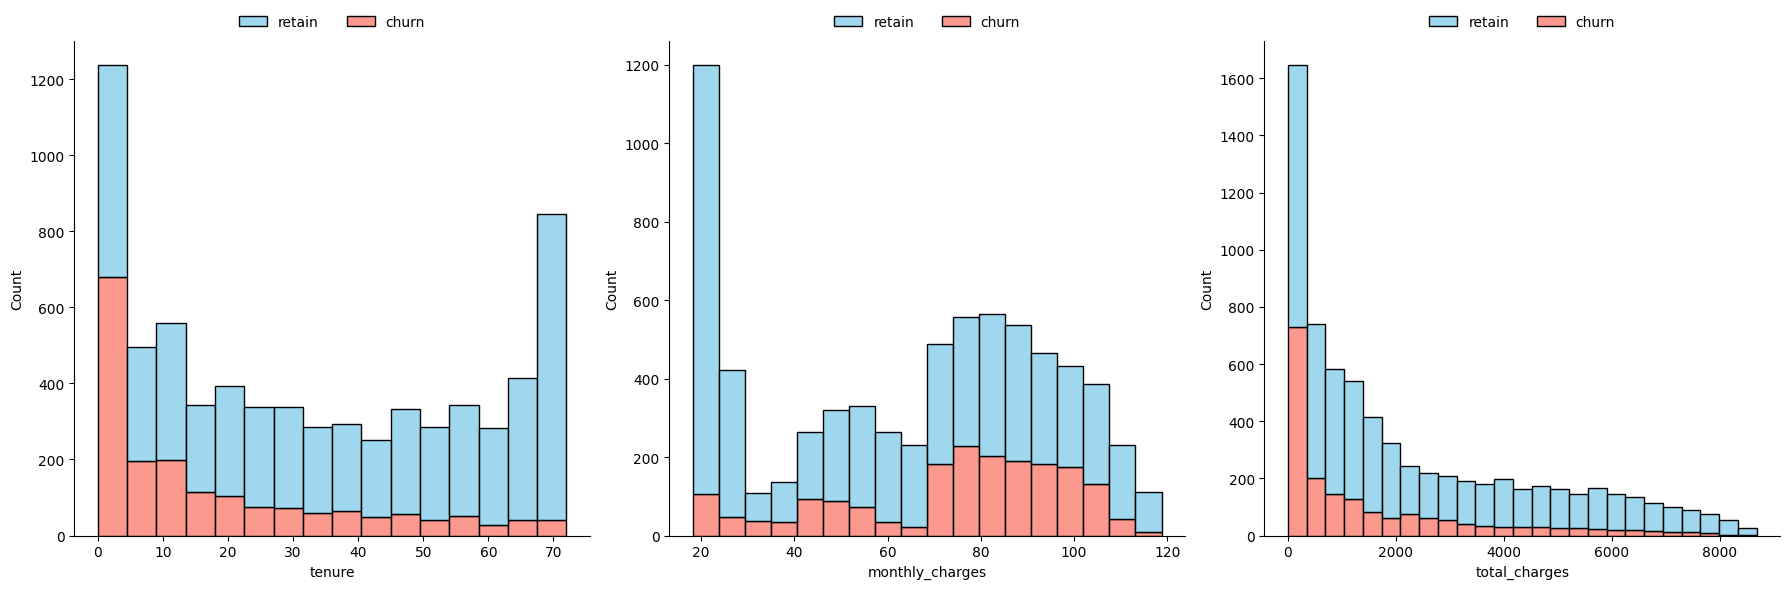

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=df, x=col, hue='churn', multiple='stack', ax=ax[i], alpha=0.8,palette=palette)
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()
plt.show()

# Data Preprocessing

Splitting the data 

In [44]:
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

In [45]:
print('X shape\t\t:', data_X.shape)
print('y shape\t\t:', data_y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (7043, 19)
y shape		: (7043,)

X_train shape	: (4930, 19)
y_train shape	: (4930,)

X_test shape	: (2113, 19)
y_test shape	: (2113,)


If customer churn = no then it will encoded as 0 else if it is yes then it will be encoded as 1

In [46]:
le = LabelEncoder()
encoded_y= le.fit_transform(data_y)


In [47]:
le.classes_

array(['No', 'Yes'], dtype=object)

Using one hot encoding for the input vectors as the feature of the dataset doesn't have any order and also dropping one catogery if feature have only 2 catogery to avoid multicollinearity as 2 catogery features can be assumed to be perfect collinear with value +1 or -1 

In [48]:
# ohe for categorical data

ohe = OneHotEncoder(sparse=False, drop='first')
X_ohe = ohe.fit_transform(data_X[column_categorical])


In [49]:
X_ohe

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [50]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['gender_Male', 'senior_citizen_1', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'contract_One year', 'contract_Two year',
       'paperless_billing_Yes', 'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype=object)

Making snake_case

In [51]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('_(automatic)','')

column_ohe

array(['gender_male', 'senior_citizen_1', 'partner_yes', 'dependents_yes',
       'phone_service_yes', 'multiple_lines_yes',
       'internet_service_fiber_optic', 'internet_service_no',
       'online_security_yes', 'online_backup_yes',
       'device_protection_yes', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'contract_one_year', 'contract_two_year',
       'paperless_billing_yes', 'payment_method_credit_card',
       'payment_method_electronic_check', 'payment_method_mailed_check'],
      dtype=object)

In [52]:
# With column name
data_x_ohe_cat = pd.DataFrame(X_ohe,columns = column_ohe,index=data_X.index)
data_x_ohe = pd.concat([data_X.drop(columns=column_categorical), data_x_ohe_cat], axis=1)
data_x_ohe.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,...,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,1,29.85,29.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34,56.95,1889.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,45,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
X_scale = data_X.copy()
for i in column_numerical:
    scaler = MinMaxScaler()
    X_scale[[i]] = scaler.fit_transform(X_scale[[i]])

In [54]:
data_x_ohe[column_ohe].head()

,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,internet_service_no,online_security_yes,online_backup_yes,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [55]:
data_x_fin = pd.concat([X_scale[column_numerical],data_x_ohe[column_ohe]],axis=1)

In [56]:
data_x_fin.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,...,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,0.013889,0.115423,0.003437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.472222,0.385075,0.217564,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.027778,0.354229,0.012453,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.027778,0.521891,0.017462,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [57]:
encoded_y = pd.DataFrame(encoded_y, columns=['churn'])


In [58]:
encoded_y.head()

,churn
0,0
1,0
2,1
3,0
4,1


In [59]:
data_fin = pd.concat([data_x_fin,encoded_y],axis = 1)

In [60]:
data_fin.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,...,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
0,0.013889,0.115423,0.003437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0.472222,0.385075,0.217564,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0.027778,0.354229,0.012453,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.027778,0.521891,0.017462,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [61]:
data.shape,data_fin.shape

((7043, 20), (7043, 24))

# Correlation

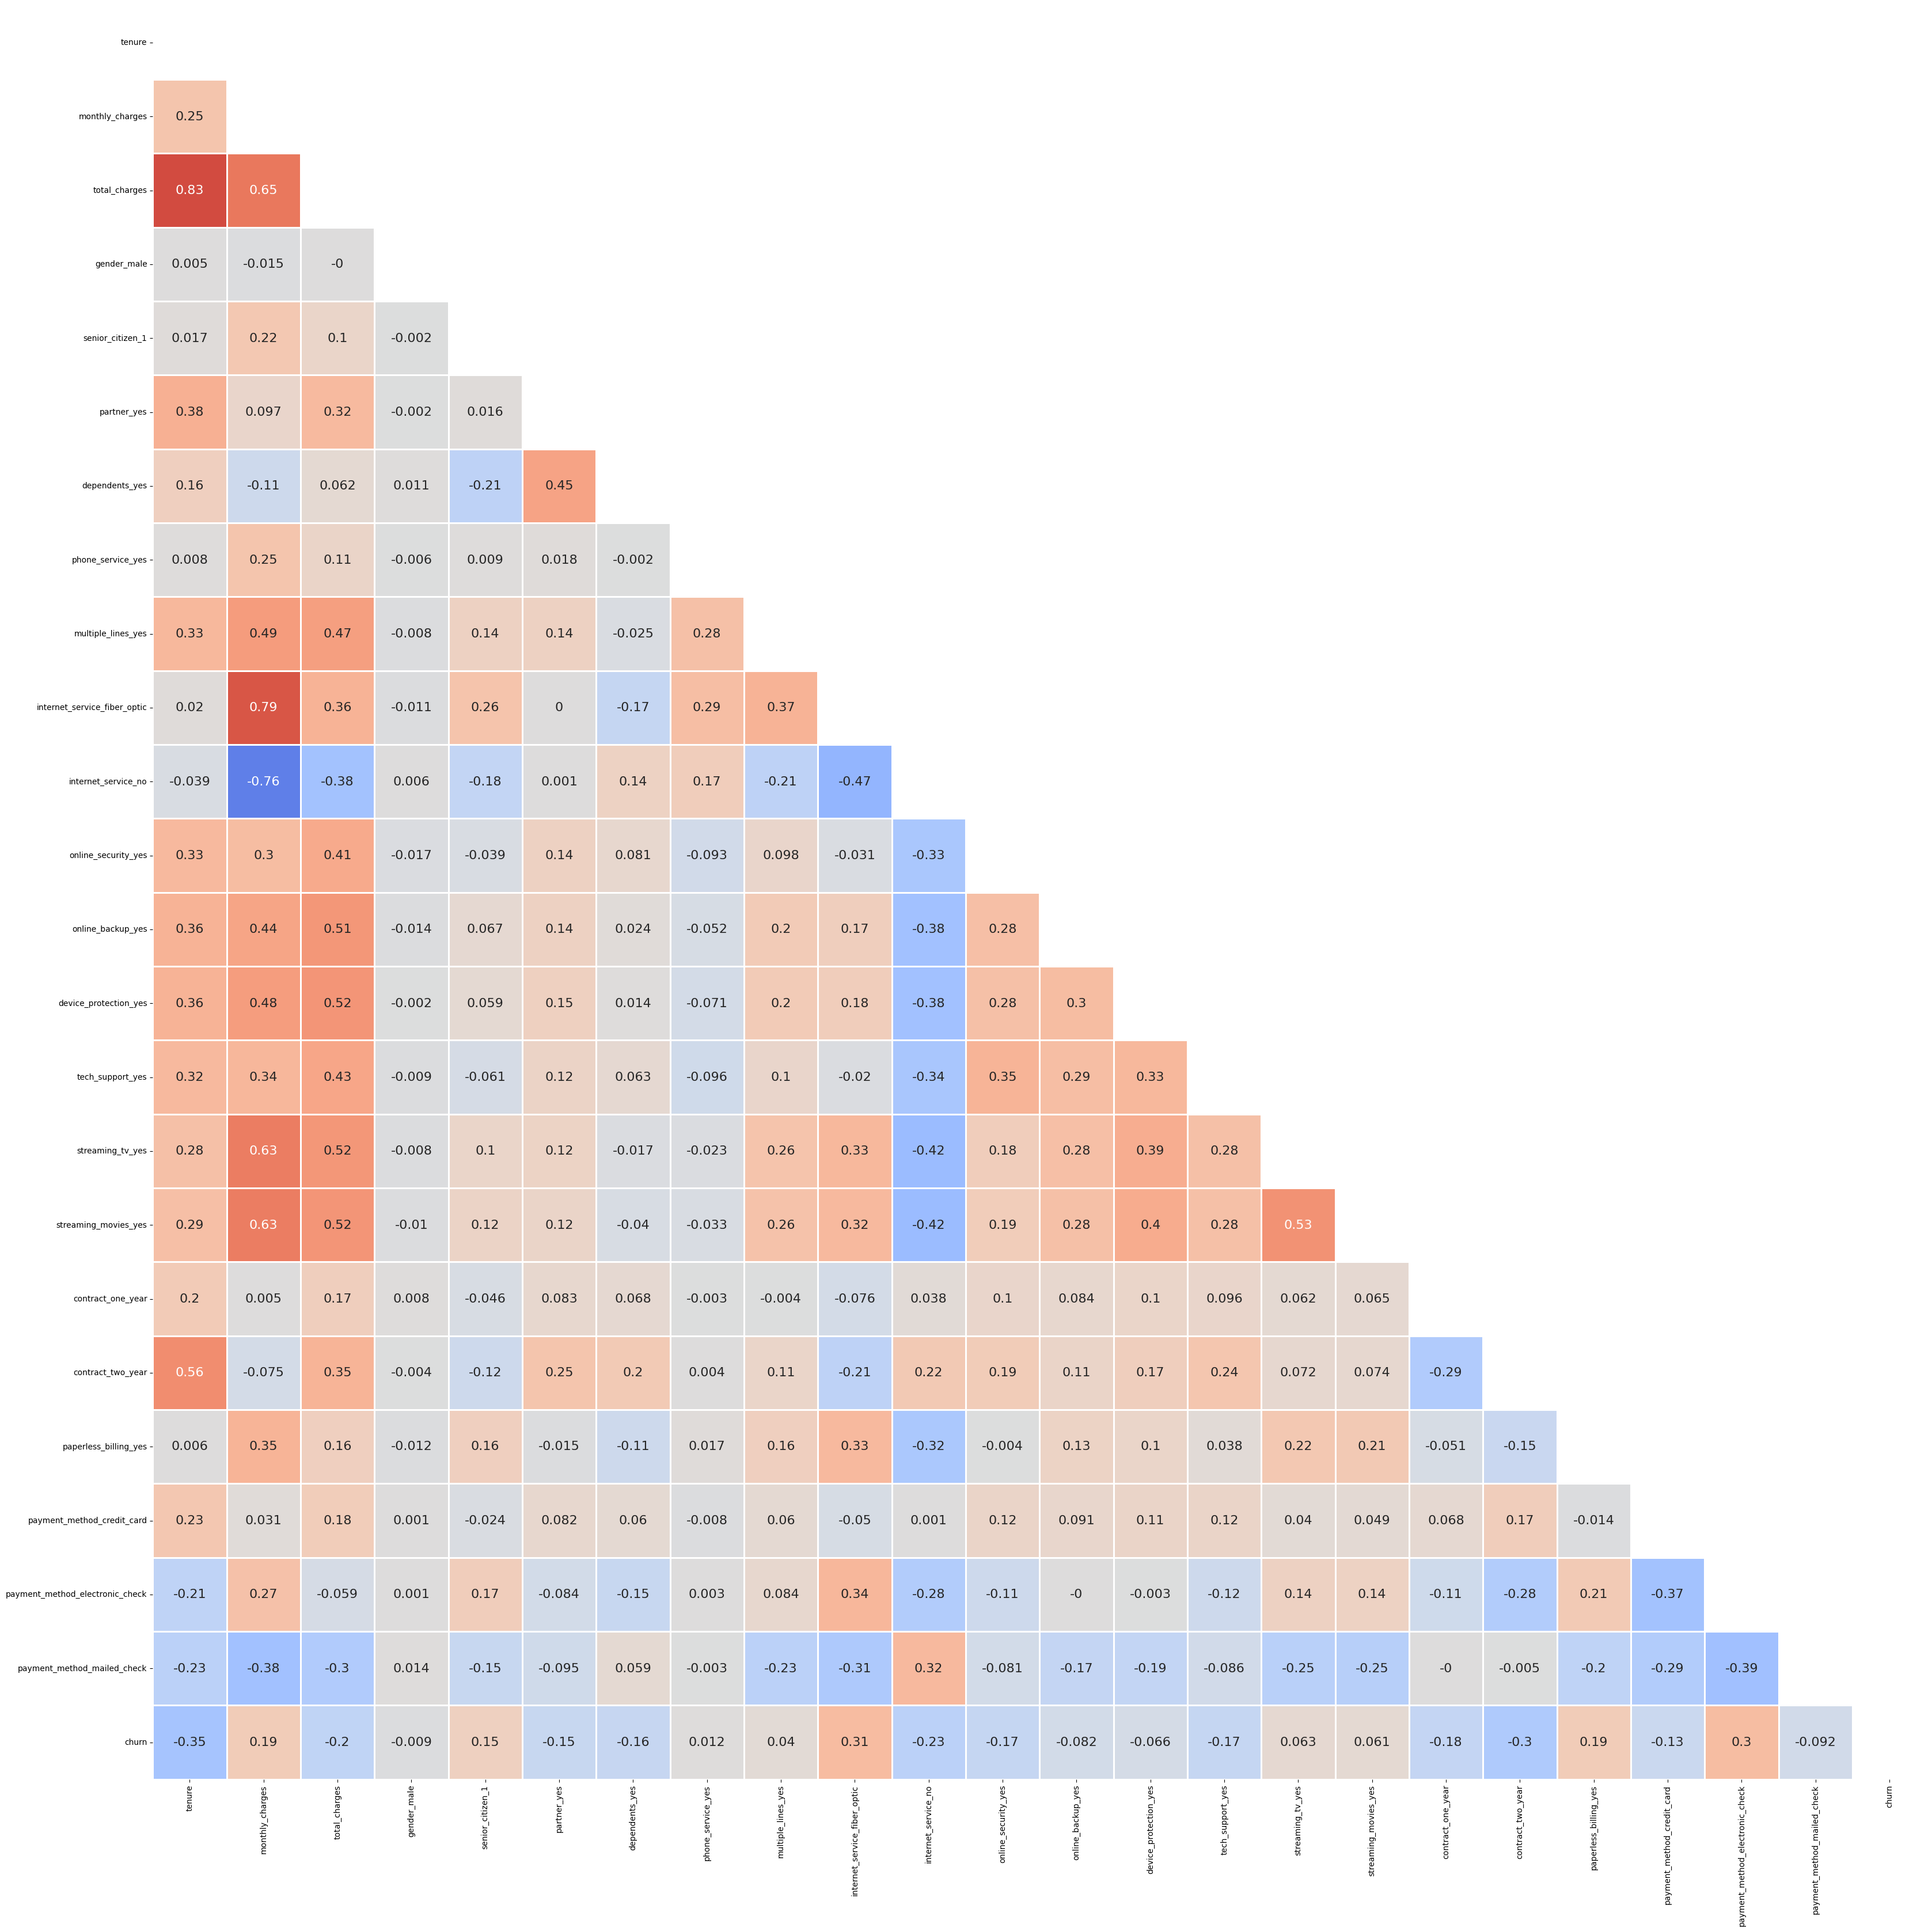

In [62]:
corr_matrix = data_fin.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

# Oversampling using SMOTE


In [63]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_fin.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

In [64]:
smote = SMOTE(random_state=202)
X_sm , y_sm = smote.fit_resample(data_x_fin,encoded_y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2)


In [65]:
data_fin['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [66]:
y_sm['churn'].value_counts()

churn
0    5174
1    5174
Name: count, dtype: int64

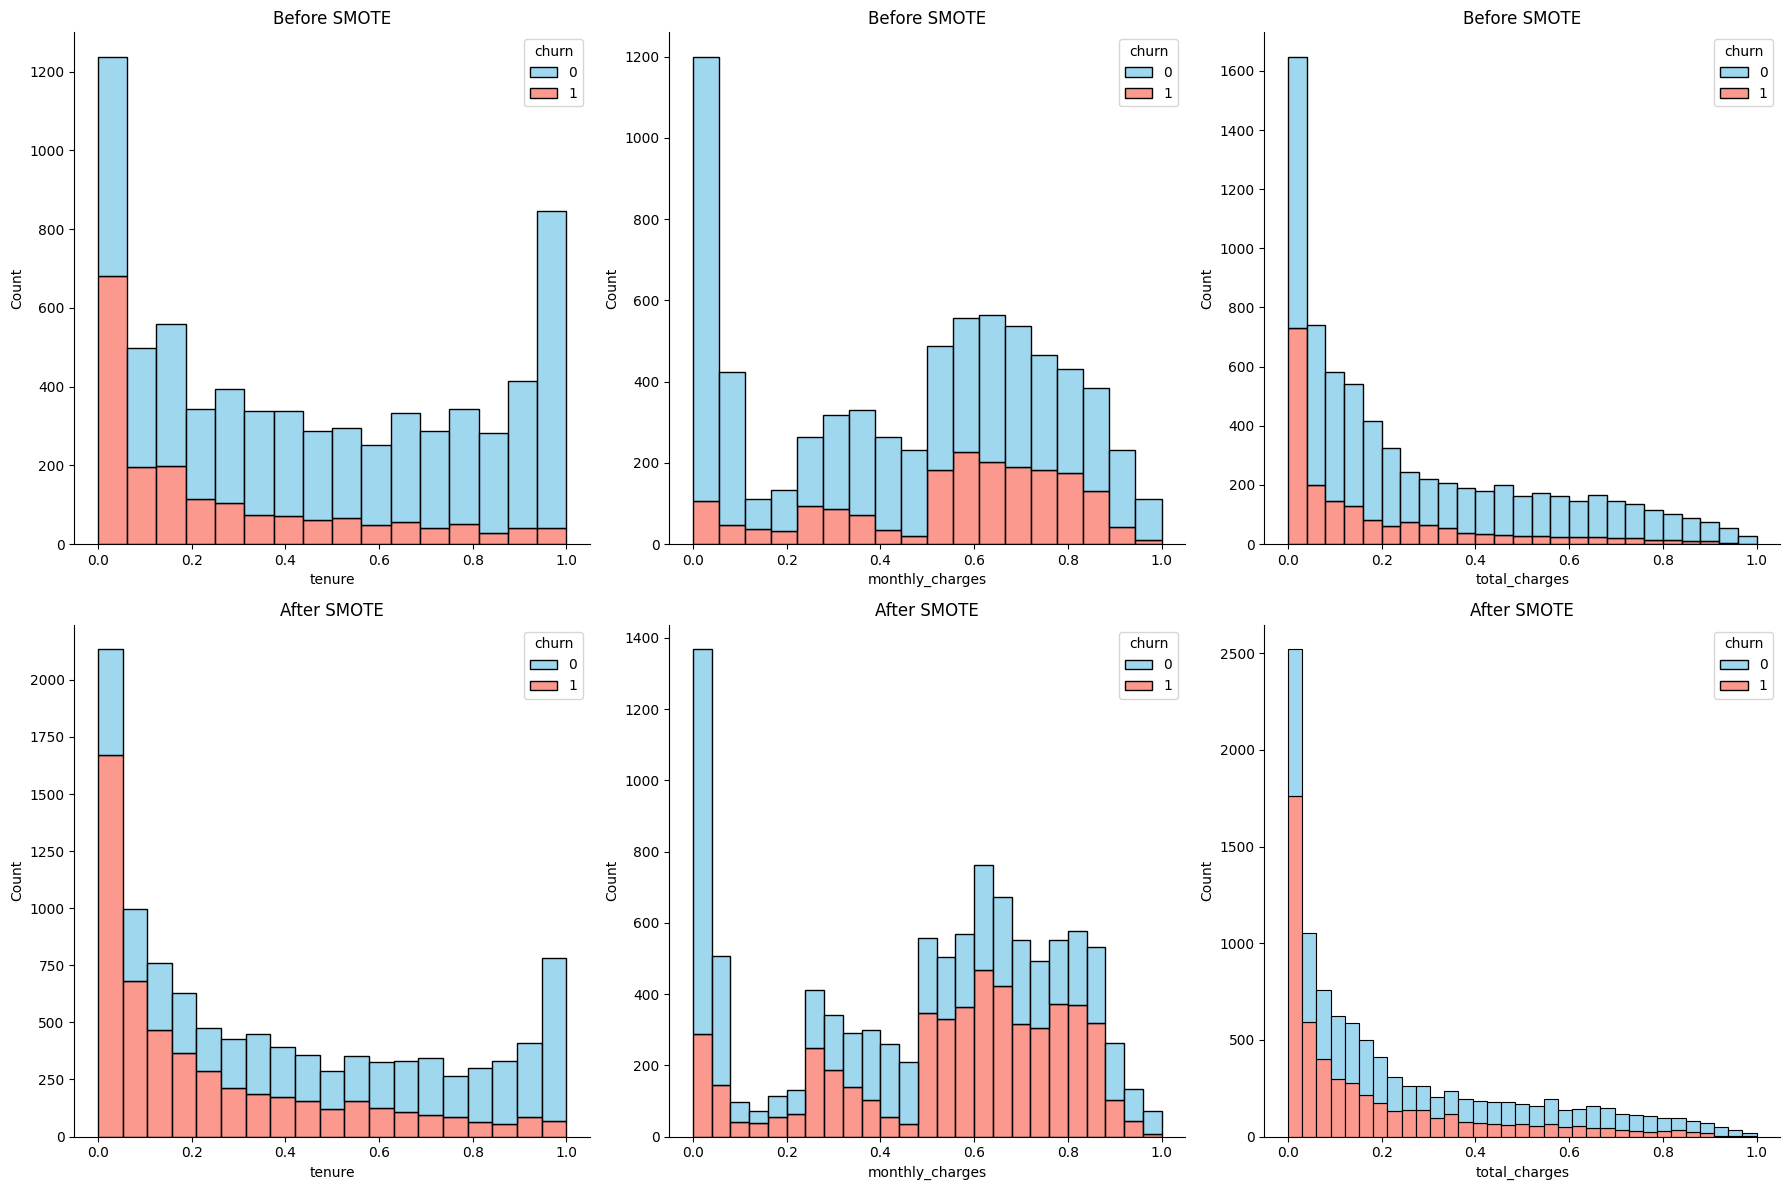

In [69]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_fin, x=col, hue='churn', multiple='stack', ax=axes_list[i], alpha=0.8,palette=palette)
  axes_list[i].set_title('Before SMOTE')

for i, col in enumerate(column_numerical):
  sns.histplot(data=pd.concat([X_sm,y_sm],axis=1), x=col, hue='churn', multiple='stack', ax=axes_list[i+3], alpha=0.8,palette=palette)
  axes_list[i+3].set_title('After SMOTE')

plt.tight_layout()
sns.despine()

plt.show()

# Score Function

In [75]:
def get_score(y_pred_list, y_test, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

  score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

Model list with default parameters

In [76]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'KNN':KNeighborsClassifier(),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
}


In [77]:
X_train,X_test,y_train,y_test = train_test_split(data_x_fin,encoded_y,test_size=0.25)

# Without Hyperparameter Tuning

Before Smote


In [78]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train, y_train)
  y_pred_list[name] = model.predict(X_test)

score = get_score(y_pred_list, y_test)

,accuracy,precision,recall,f1_score
model,,,,
Logistic Regression,0.790460,0.595908,0.524775,0.558084
KNN,0.762067,0.529551,0.504505,0.516724
Neural Network,0.750710,0.505330,0.533784,0.519168
Decision Tree,0.731970,0.468889,0.475225,0.472036
Random Forest,0.788756,0.601124,0.481982,0.535000
Gradient Boosting Classifier,0.791596,0.609065,0.484234,0.539523
AdaBoost Classifier,0.800681,0.624000,0.527027,0.571429
XGBoost,0.790460,0.594937,0.529279,0.560191


After Smote

In [79]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_sm, y_train_sm)
  y_pred_list[name] = model.predict(X_test_sm)

score = get_score(y_pred_list, y_test_sm)

,accuracy,precision,recall,f1_score
model,,,,
Logistic Regression,0.787923,0.751309,0.848276,0.796853
KNN,0.784541,0.723488,0.907389,0.805070
Neural Network,0.824638,0.804104,0.849261,0.826066
Decision Tree,0.795169,0.784408,0.802956,0.793574
Random Forest,0.849275,0.837009,0.860099,0.848397
Gradient Boosting Classifier,0.839614,0.808491,0.881773,0.843544
AdaBoost Classifier,0.815942,0.780035,0.869951,0.822543
XGBoost,0.846860,0.839494,0.850246,0.844836


# Appyling Hyperparameter Tuning using Bayesian Optimization


**Without SMOTE**

In [80]:
# Define the objective function for logistic regression
def lr_cv(params):
    clf = LogisticRegression(max_iter=1000, random_state=1, **params)
    clf.fit(X_train, y_train)
    return -accuracy_score(y_test, clf.predict(X_test))

# Define the objective function for gradient boosting classifier
def gbc_cv(params):
    clf = GradientBoostingClassifier(random_state=1, **params)
    clf.fit(X_train, y_train)
    return -accuracy_score(y_test, clf.predict(X_test))

# Define the objective function for AdaBoost classifier
def abc_cv(params):
    clf = AdaBoostClassifier(random_state=1, **params)
    clf.fit(X_train, y_train)
    return -accuracy_score(y_test, clf.predict(X_test))

# Define the objective function for XGBoost
def xgb_cv(params):
    clf = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss', **params)
    clf.fit(X_train, y_train)
    return -accuracy_score(y_test, clf.predict(X_test))

# Define the objective function for random forest
def rf_cv(params):
    clf = RandomForestClassifier(random_state=1, **params)
    clf.fit(X_train, y_train)
    return -accuracy_score(y_test, clf.predict(X_test))

# Define the objective function for KNN
def knn_cv(params):
    clf = KNeighborsClassifier(**params)
    clf.fit(X_train, y_train)
    return -accuracy_score(y_test, clf.predict(X_test))

# Define the objective function for Neural Network
def nn_cv(params):
    clf = MLPClassifier(max_iter=1000, random_state=1, **params)
    clf.fit(X_train, y_train)
    return -accuracy_score(y_test, clf.predict(X_test))

# Define the objective function for Decision Tree
def dt_cv(params):
    clf = DecisionTreeClassifier(random_state=1, **params)
    clf.fit(X_train, y_train)
    return -accuracy_score(y_test, clf.predict(X_test))

# Define the search space for each model
space_lr = {
    'C': hp.loguniform('C', 0, 4)
}
space_gbc = {
    'n_estimators': hp.choice('n_estimators', range(10, 251)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'max_depth': hp.choice('max_depth', range(3, 11))
}
space_abc = {
    'n_estimators': hp.choice('n_estimators', range(10, 251)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5)
}
space_xgb = {
    'n_estimators': hp.choice('n_estimators', range(10, 251)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'max_depth': hp.choice('max_depth', range(3, 11)),
    'gamma': hp.uniform('gamma', 0, 5),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10)
}
space_rf = {
    'n_estimators': hp.choice('n_estimators', range(10, 251)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 26)),
    'max_features': hp.uniform('max_features', 0.1, 0.999)
}
space_knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 21)),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.uniform('p', 1, 2)
}
space_nn = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)]),
    'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
    'alpha': hp.loguniform('alpha', -5, 0)
}
space_dt = {
    'max_depth': hp.choice('max_depth', range(1, 21)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 21)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 21)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

# Define the optimization algorithm for each model
algo_lr = tpe.suggest
algo_gbc = tpe.suggest
algo_abc = tpe.suggest
algo_xgb = tpe.suggest
algo_rf = tpe.suggest
algo_knn = tpe.suggest
algo_nn = tpe.suggest
algo_dt = tpe.suggest

# Define the trials object for each model
trials_lr = Trials()
trials_gbc = Trials()
trials_abc = Trials()
trials_xgb = Trials()
trials_rf = Trials()
trials_knn = Trials()
trials_nn = Trials()
trials_dt = Trials()

# Perform Bayesian Optimization for each model
best_lr = fmin(fn=lr_cv, space=space_lr, algo=algo_lr, trials=trials_lr, max_evals=40)
best_gbc = fmin(fn=gbc_cv, space=space_gbc, algo=algo_gbc, trials=trials_gbc, max_evals=40)
best_abc = fmin(fn=abc_cv, space=space_abc, algo=algo_abc, trials=trials_abc, max_evals=40)
best_xgb = fmin(fn=xgb_cv, space=space_xgb, algo=algo_xgb, trials=trials_xgb, max_evals=40)
best_rf = fmin(fn=rf_cv, space=space_rf, algo=algo_rf, trials=trials_rf, max_evals=40)
best_knn = fmin(fn=knn_cv, space=space_knn, algo=algo_knn, trials=trials_knn, max_evals=40)
best_nn = fmin(fn=nn_cv, space=space_nn, algo=algo_nn, trials=trials_nn, max_evals=40)
best_dt = fmin(fn=dt_cv, space=space_dt, algo=algo_dt, trials=trials_dt, max_evals=40)

best_gbc['n_estimators']=best_gbc['n_estimators']+10
best_gbc['max_depth']=best_gbc['max_depth']+3
best_abc['n_estimators']=best_abc['n_estimators']+10
best_xgb['n_estimators']=best_xgb['n_estimators']+10
best_xgb['max_depth']=best_xgb['max_depth']+3
best_rf['n_estimators']=best_rf['n_estimators']+10
best_rf['min_samples_split']=best_rf['min_samples_split']+2
best_knn['n_neighbors']=best_knn['n_neighbors']+1
best_knn['weights']=['uniform','distance'][best_knn['weights']]
best_nn['hidden_layer_sizes']=[(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)][best_nn['hidden_layer_sizes']]
best_nn['activation']=['identity', 'logistic', 'tanh', 'relu'][best_nn['activation']]
best_dt['max_depth']=best_dt['max_depth']+1
best_dt['min_samples_split']=best_dt['min_samples_split']+2
best_dt['min_samples_leaf']=best_dt['min_samples_leaf']+1
best_dt['criterion']=["gini", "entropy"][best_dt['criterion']]

# Print the best parameters for each model
print("Logistic Regression:", best_lr)
print("Gradient Boosting Classifier:", best_gbc)
print("AdaBoost Classifier:", best_abc)
print("XGBoost:", best_xgb)
print("Random Forest:", best_rf)
print("KNN:", best_knn)
print("Neural Network:", best_nn)
print("Decision Tree:", best_dt)

100%|██████████| 40/40 [00:01<00:00, 28.39trial/s, best loss: -0.7876206700738216]
Logistic Regression: {'C': 28.184104842809656}
Gradient Boosting Classifier: {'learning_rate': 0.27537506526972105, 'max_depth': 5, 'n_estimators': 25}
AdaBoost Classifier: {'learning_rate': 0.4043261783516341, 'n_estimators': 201}
XGBoost: {'gamma': 2.6887579049060597, 'learning_rate': 0.3903560341241941, 'max_depth': 7, 'min_child_weight': 1.573218153666608, 'n_estimators': 91}
Random Forest: {'max_features': 0.23315499748403293, 'min_samples_split': 9, 'n_estimators': 105}
KNN: {'n_neighbors': 18, 'p': 1.208901758330263, 'weights': 'uniform'}
Neural Network: {'activation': 'tanh', 'alpha': 0.2453825645873301, 'hidden_layer_sizes': (100, 100)}
Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 9}


**Best model with best parameters**

In [81]:
best_model = {
    'Logistic Regression': (LogisticRegression(max_iter=100, random_state=1, **best_lr),
                             best_lr),
    'Gradient Boosting Classifier': (GradientBoostingClassifier(random_state=1, **best_gbc),
                                      best_gbc),
    'AdaBoost Classifier': (AdaBoostClassifier(random_state=1, **best_abc),
                            best_abc),
    'XGBoost': (XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss', **best_xgb),
                best_xgb),
    'Random Forest': (RandomForestClassifier(random_state=1, **best_rf),
                      best_rf),
    'KNN': (KNeighborsClassifier(**best_knn),
            best_knn),
    'Neural Network': (MLPClassifier(max_iter=1000, random_state=1, **best_nn),
                       best_nn),
    'Decision Tree': (DecisionTreeClassifier(random_state=1, **best_dt),
                      best_dt)
}



**SCORE**

In [82]:
y_pred_list = {}

for model_name, (model, best_hyperparameters) in best_model.items():
    # Update the model with the best hyperparameters
    model.set_params(**best_hyperparameters)
    model.fit(X_train, y_train)
    y_pred_list[model_name] = model.predict(X_test)

# Calculate the score
score = get_score(y_pred_list, y_test)

,accuracy,precision,recall,f1_score
model,,,,
Logistic Regression,0.792731,0.601542,0.527027,0.561825
Gradient Boosting Classifier,0.796706,0.617486,0.509009,0.558025
AdaBoost Classifier,0.800681,0.625337,0.522523,0.569325
XGBoost,0.798978,0.619048,0.527027,0.569343
Random Forest,0.799546,0.631124,0.493243,0.553729
KNN,0.780806,0.574359,0.504505,0.537170
Neural Network,0.799546,0.640867,0.466216,0.539765
Decision Tree,0.787621,0.588384,0.524775,0.554762


**Using SMOTE**

In [83]:
# Define the objective function for logistic regression
def lr_cv(params):
    clf = LogisticRegression(max_iter=1000, random_state=1, **params)
    clf.fit(X_train_sm, y_train_sm)
    return -accuracy_score(y_test_sm, clf.predict(X_test_sm))

# Define the objective function for gradient boosting classifier
def gbc_cv(params):
    clf = GradientBoostingClassifier(random_state=1, **params)
    clf.fit(X_train_sm, y_train_sm)
    return -accuracy_score(y_test_sm, clf.predict(X_test_sm))

# Define the objective function for AdaBoost classifier
def abc_cv(params):
    clf = AdaBoostClassifier(random_state=1, **params)
    clf.fit(X_train_sm, y_train_sm)
    return -accuracy_score(y_test_sm, clf.predict(X_test_sm))

# Define the objective function for XGBoost
def xgb_cv(params):
    clf = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss', **params)
    clf.fit(X_train_sm, y_train_sm)
    return -accuracy_score(y_test_sm, clf.predict(X_test_sm))

# Define the objective function for random forest
def rf_cv(params):
    clf = RandomForestClassifier(random_state=1, **params)
    clf.fit(X_train_sm, y_train_sm)
    return -accuracy_score(y_test_sm, clf.predict(X_test_sm))

# Define the objective function for KNN
def knn_cv(params):
    clf = KNeighborsClassifier(**params)
    clf.fit(X_train_sm, y_train_sm)
    return -accuracy_score(y_test_sm, clf.predict(X_test_sm))

# Define the objective function for Neural Network
def nn_cv(params):
    clf = MLPClassifier(max_iter=1000, random_state=1, **params)
    clf.fit(X_train_sm, y_train_sm)
    return -accuracy_score(y_test_sm, clf.predict(X_test_sm))

# Define the objective function for Decision Tree
def dt_cv(params):
    clf = DecisionTreeClassifier(random_state=1, **params)
    clf.fit(X_train_sm, y_train_sm)
    return -accuracy_score(y_test_sm, clf.predict(X_test_sm))


# Define the optimization algorithm for each model
algo_lr_sm = tpe.suggest
algo_gbc_sm = tpe.suggest
algo_abc_sm = tpe.suggest
algo_xgb_sm = tpe.suggest
algo_rf_sm = tpe.suggest
algo_knn_sm = tpe.suggest
algo_nn_sm = tpe.suggest
algo_dt_sm = tpe.suggest

# Define the trials object for each model
trials_lr_sm = Trials()
trials_gbc_sm = Trials()
trials_abc_sm = Trials()
trials_xgb_sm = Trials()
trials_rf_sm = Trials()
trials_knn_sm = Trials()
trials_nn_sm = Trials()
trials_dt_sm = Trials()

# Perform Bayesian Optimization for each model
best_lr_sm = fmin(fn=lr_cv, space=space_lr, algo=algo_lr_sm, trials=trials_lr_sm, max_evals=40)
best_gbc_sm = fmin(fn=gbc_cv, space=space_gbc, algo=algo_gbc_sm, trials=trials_gbc_sm, max_evals=40)
best_abc_sm = fmin(fn=abc_cv, space=space_abc, algo=algo_abc_sm, trials=trials_abc_sm, max_evals=40)
best_xgb_sm = fmin(fn=xgb_cv, space=space_xgb, algo=algo_xgb_sm, trials=trials_xgb_sm, max_evals=40)
best_rf_sm = fmin(fn=rf_cv, space=space_rf, algo=algo_rf_sm, trials=trials_rf_sm, max_evals=40)
best_knn_sm = fmin(fn=knn_cv, space=space_knn, algo=algo_knn_sm, trials=trials_knn_sm, max_evals=40)
best_nn_sm = fmin(fn=nn_cv, space=space_nn, algo=algo_nn_sm, trials=trials_nn_sm, max_evals=40)
best_dt_sm = fmin(fn=dt_cv, space=space_dt, algo=algo_dt_sm, trials=trials_dt_sm, max_evals=40)


best_gbc_sm['n_estimators'] = best_gbc_sm['n_estimators'] + 10
best_gbc_sm['max_depth'] = best_gbc_sm['max_depth'] + 3
best_abc_sm['n_estimators'] = best_abc_sm['n_estimators'] + 10
best_xgb_sm['n_estimators'] = best_xgb_sm['n_estimators'] + 10
best_xgb_sm['max_depth'] = best_xgb_sm['max_depth'] + 3
best_rf_sm['n_estimators'] = best_rf_sm['n_estimators'] + 10
best_rf_sm['min_samples_split'] = best_rf_sm['min_samples_split'] + 2
best_knn_sm['n_neighbors'] = best_knn_sm['n_neighbors'] + 1
best_knn_sm['weights'] = ['uniform', 'distance'][best_knn_sm['weights']]
best_nn_sm['hidden_layer_sizes'] = [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)][best_nn_sm['hidden_layer_sizes']]
best_nn_sm['activation'] = ['identity', 'logistic', 'tanh', 'relu'][best_nn_sm['activation']]
best_dt_sm['max_depth'] = best_dt_sm['max_depth'] + 1
best_dt_sm['min_samples_split'] = best_dt_sm['min_samples_split'] + 2
best_dt_sm['min_samples_leaf'] = best_dt_sm['min_samples_leaf'] + 1
best_dt_sm['criterion'] = ["gini", "entropy"][best_dt_sm['criterion']]


# Print the best parameters for each model
print("Logistic Regression:", best_lr_sm)
print("Gradient Boosting Classifier:", best_gbc_sm)
print("AdaBoost Classifier:", best_abc_sm)
print("XGBoost:", best_xgb_sm)
print("Random Forest:", best_rf_sm)
print("KNN:", best_knn_sm)
print("Neural Network:", best_nn_sm)
print("Decision Tree:", best_dt_sm)

  5%|▌         | 2/40 [00:51<18:40, 29.49s/trial, best loss: -0.8140096618357487]

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 10%|█         | 4/40 [01:54<20:33, 34.26s/trial, best loss: -0.8270531400966183]

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



100%|██████████| 40/40 [00:02<00:00, 19.01trial/s, best loss: -0.8091787439613527]
Logistic Regression: {'C': 1.1535165954951416}
Gradient Boosting Classifier: {'learning_rate': 0.3441140240129832, 'max_depth': 9, 'n_estimators': 122}
AdaBoost Classifier: {'learning_rate': 0.4613676997268137, 'n_estimators': 245}
XGBoost: {'gamma': 0.24222039631493558, 'learning_rate': 0.15117461941871824, 'max_depth': 10, 'min_child_weight': 3.670140101981049, 'n_estimators': 205}
Random Forest: {'max_features': 0.12043440722655085, 'min_samples_split': 4, 'n_estimators': 206}
KNN: {'n_neighbors': 4, 'p': 1.004442088607722, 'weights': 'distance'}
Neural Network: {'activation': 'relu', 'alpha': 0.053328945988026226, 'hidden_layer_sizes': (100, 100)}
Decision Tree: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 6}


**Best model with best Hyperparamters and Using SMOTE**

In [84]:
# with smote
best_model_sm = {
    'Logistic Regression': (LogisticRegression(max_iter=100, random_state=1, **best_lr),
                             best_lr_sm),
    'Gradient Boosting Classifier': (GradientBoostingClassifier(random_state=1, **best_gbc),
                                      best_gbc_sm),
    'AdaBoost Classifier': (AdaBoostClassifier(random_state=1, **best_abc),
                            best_abc_sm),
    'XGBoost': (XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss', **best_xgb),
                best_xgb_sm),
    'Random Forest': (RandomForestClassifier(random_state=1, **best_rf),
                      best_rf_sm),
    'KNN': (KNeighborsClassifier(**best_knn),
            best_knn_sm),
    'Neural Network': (MLPClassifier(max_iter=1000, random_state=1, **best_nn),
                       best_nn_sm),
    'Decision Tree': (DecisionTreeClassifier(random_state=1, **best_dt),
                      best_dt_sm)
}



In [85]:
# smote with tuning
y_pred_list_sm = {}

for model_name, (model, best_hyperparameters) in best_model_sm.items():
    # Update the model with the best hyperparameters
    model.set_params(**best_hyperparameters)
    
    # Fit the model on the training data
    model.fit(X_train_sm, y_train_sm)
    
    # Predict on the test data
    y_pred_list_sm[model_name] = model.predict(X_test_sm)

# Calculate the score
score_sm = get_score(y_pred_list_sm, y_test_sm)


,accuracy,precision,recall,f1_score
model,,,,
Logistic Regression,0.786957,0.750436,0.847291,0.795928
Gradient Boosting Classifier,0.854106,0.856144,0.844335,0.850198
AdaBoost Classifier,0.829469,0.793961,0.880788,0.835124
XGBoost,0.858454,0.845124,0.870936,0.857836
Random Forest,0.855072,0.838221,0.872906,0.855212
KNN,0.829952,0.781170,0.907389,0.839562
Neural Network,0.845411,0.823858,0.870936,0.846743
Decision Tree,0.809179,0.772887,0.865025,0.816364


**Comparision of ROC Curve on Hyperparamter tuned model**

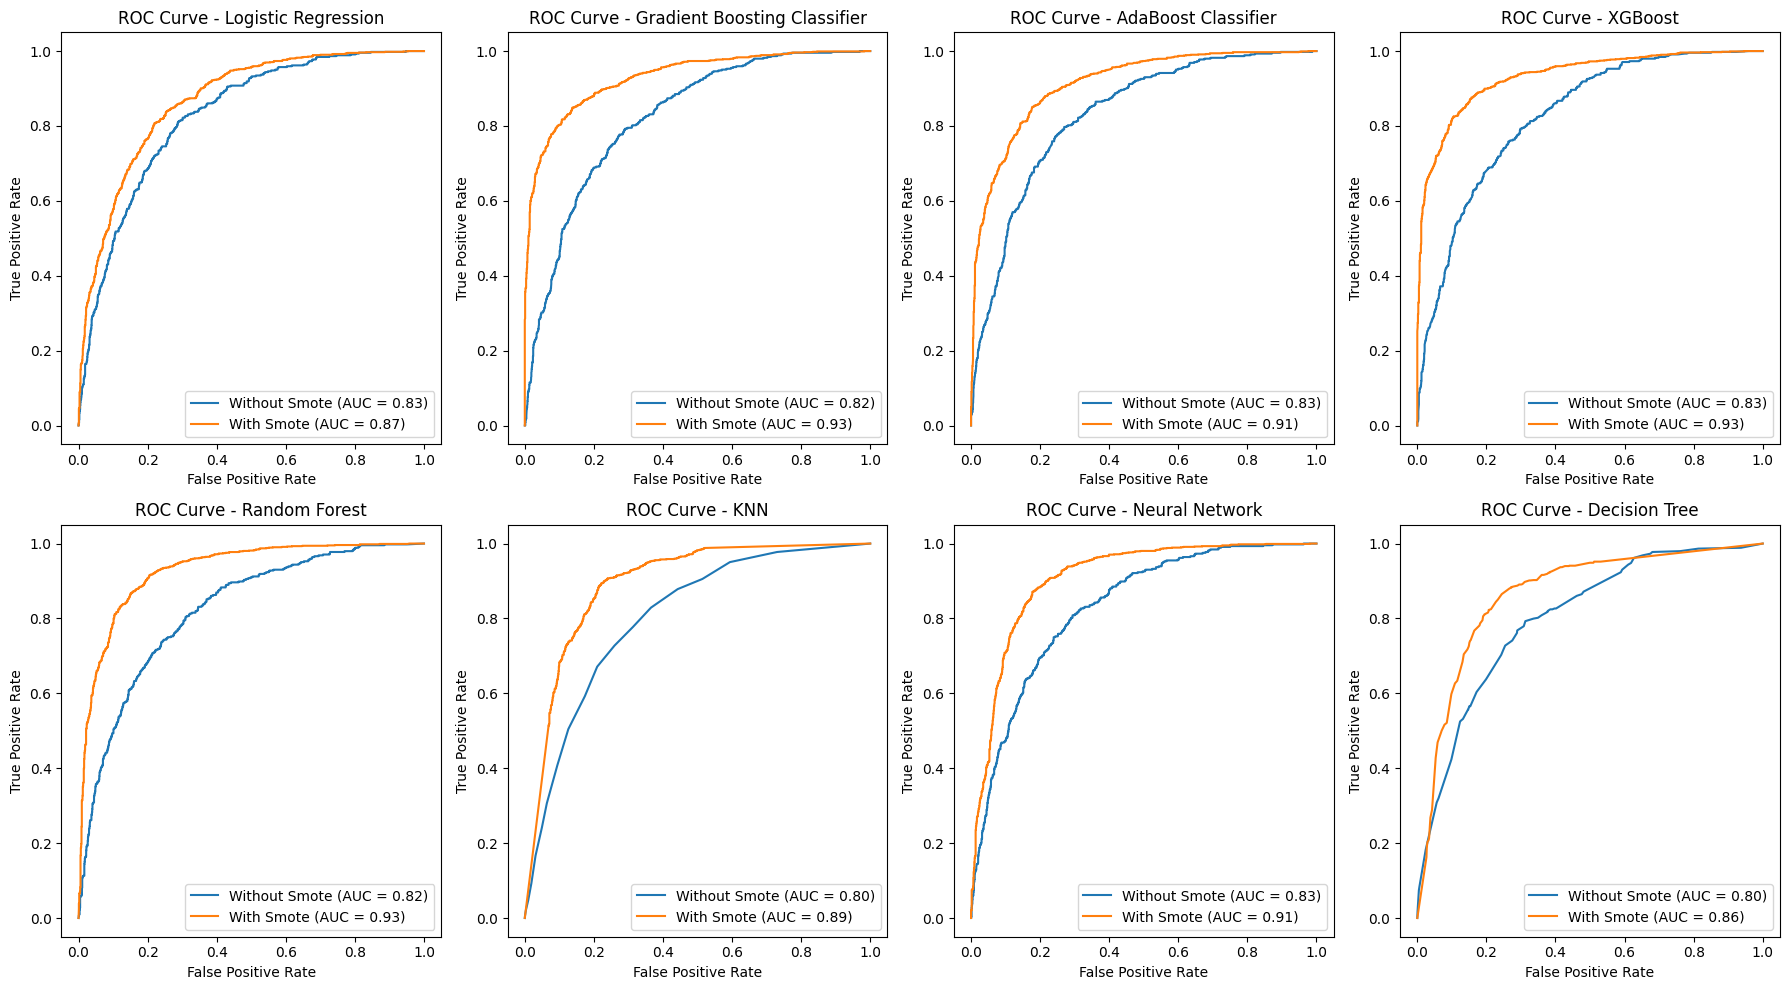

In [86]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define a function to plot ROC curve for each model
def plot_roc_curve(model, X_test, y_test, model_name,p, ax=None):
    if ax is None:
        ax = plt.gca()
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    ax.plot(fpr, tpr, label=f'{p} (AUC = {auc:.2f})')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model_name}')
    ax.legend()

# Create a figure and subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

# Iterate over each model and plot its ROC curve

for idx, (model_name, (model, best_params)) in enumerate(best_model.items()):
    row = idx // 4
    col = idx % 4
    model.fit(X_train, y_train)
    plot_roc_curve(model, X_test, y_test, model_name,'Without Smote', ax=axes[row, col])
    
    
for idx, (model_name, (model, best_params)) in enumerate(best_model_sm.items()):
    row = idx // 4
    col = idx % 4
    model.fit(X_train_sm, y_train_sm)
    plot_roc_curve(model, X_test_sm, y_test_sm, model_name, 'With Smote',ax=axes[row, col])

plt.tight_layout()
plt.show()


**Confusion matrix (without SMOTE)**

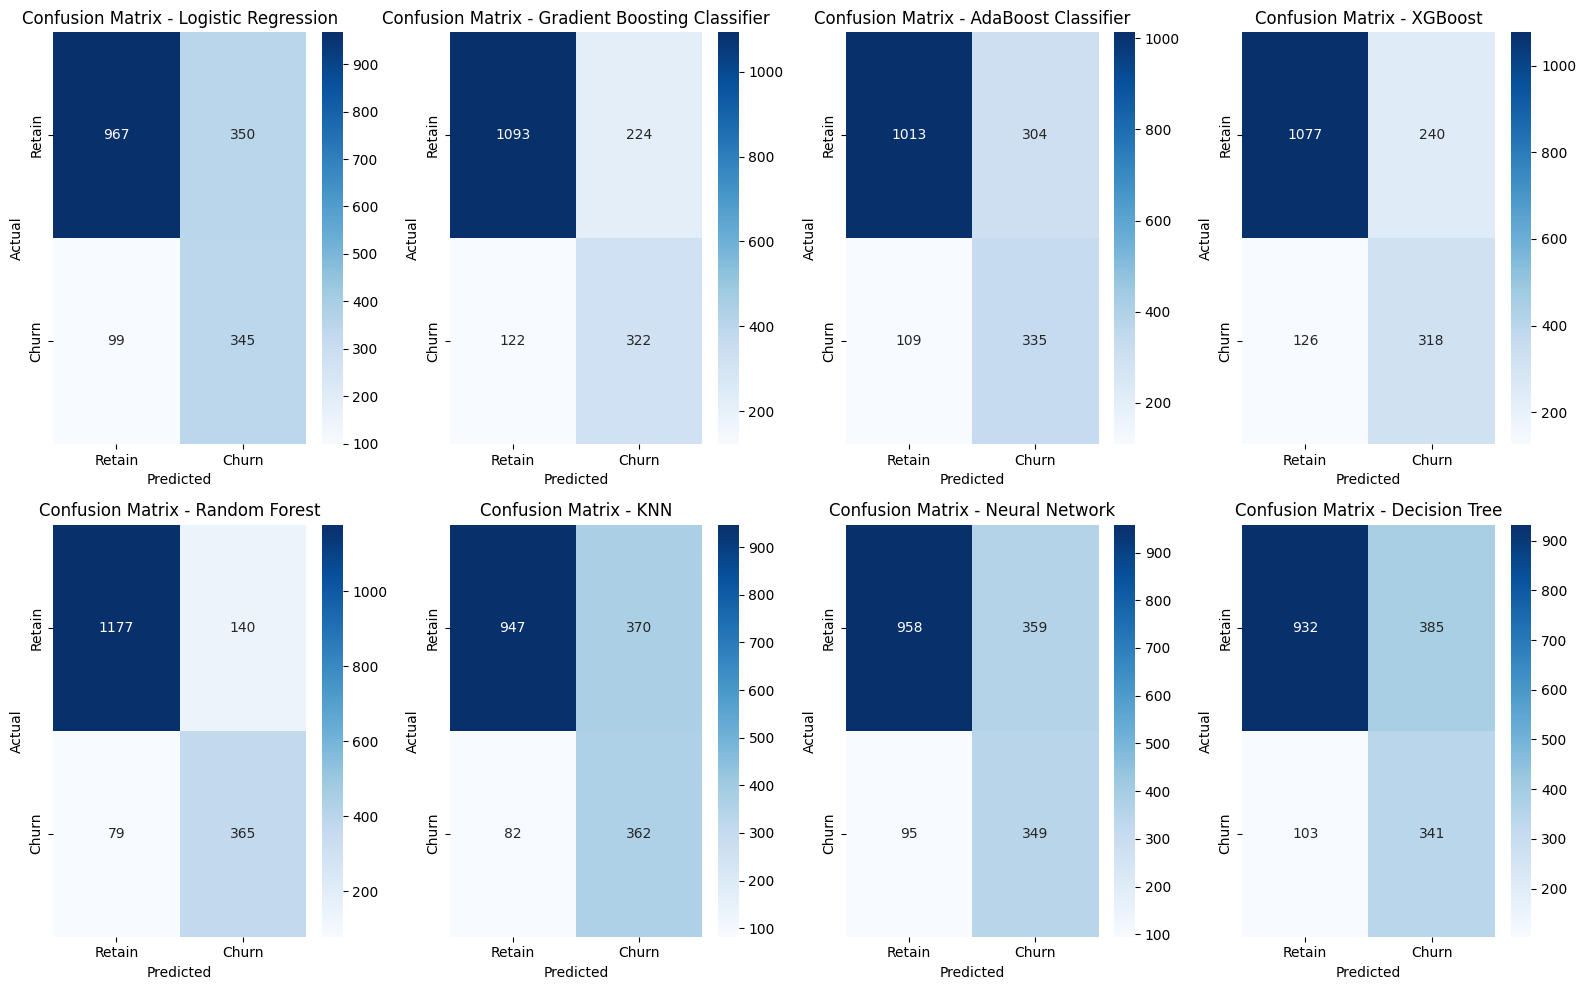

In [87]:

# Function to plot the confusion matrix for each model
def plot_confusion_matrix(model, X_test, y_test, model_name, ax):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retain', 'Churn'], yticklabels=['Retain', 'Churn'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model_name}')

# Create a subplot grid
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

# Iterate over each model and plot its confusion matrix
for (model_name, (model, _)), ax in zip(best_model.items(), axes.flatten()):
    model.fit(X_train_sm, y_train_sm)
    plot_confusion_matrix(model, X_test, y_test, model_name, ax)

plt.tight_layout()
plt.show()


**Confusion matrix (with SMOTE)**

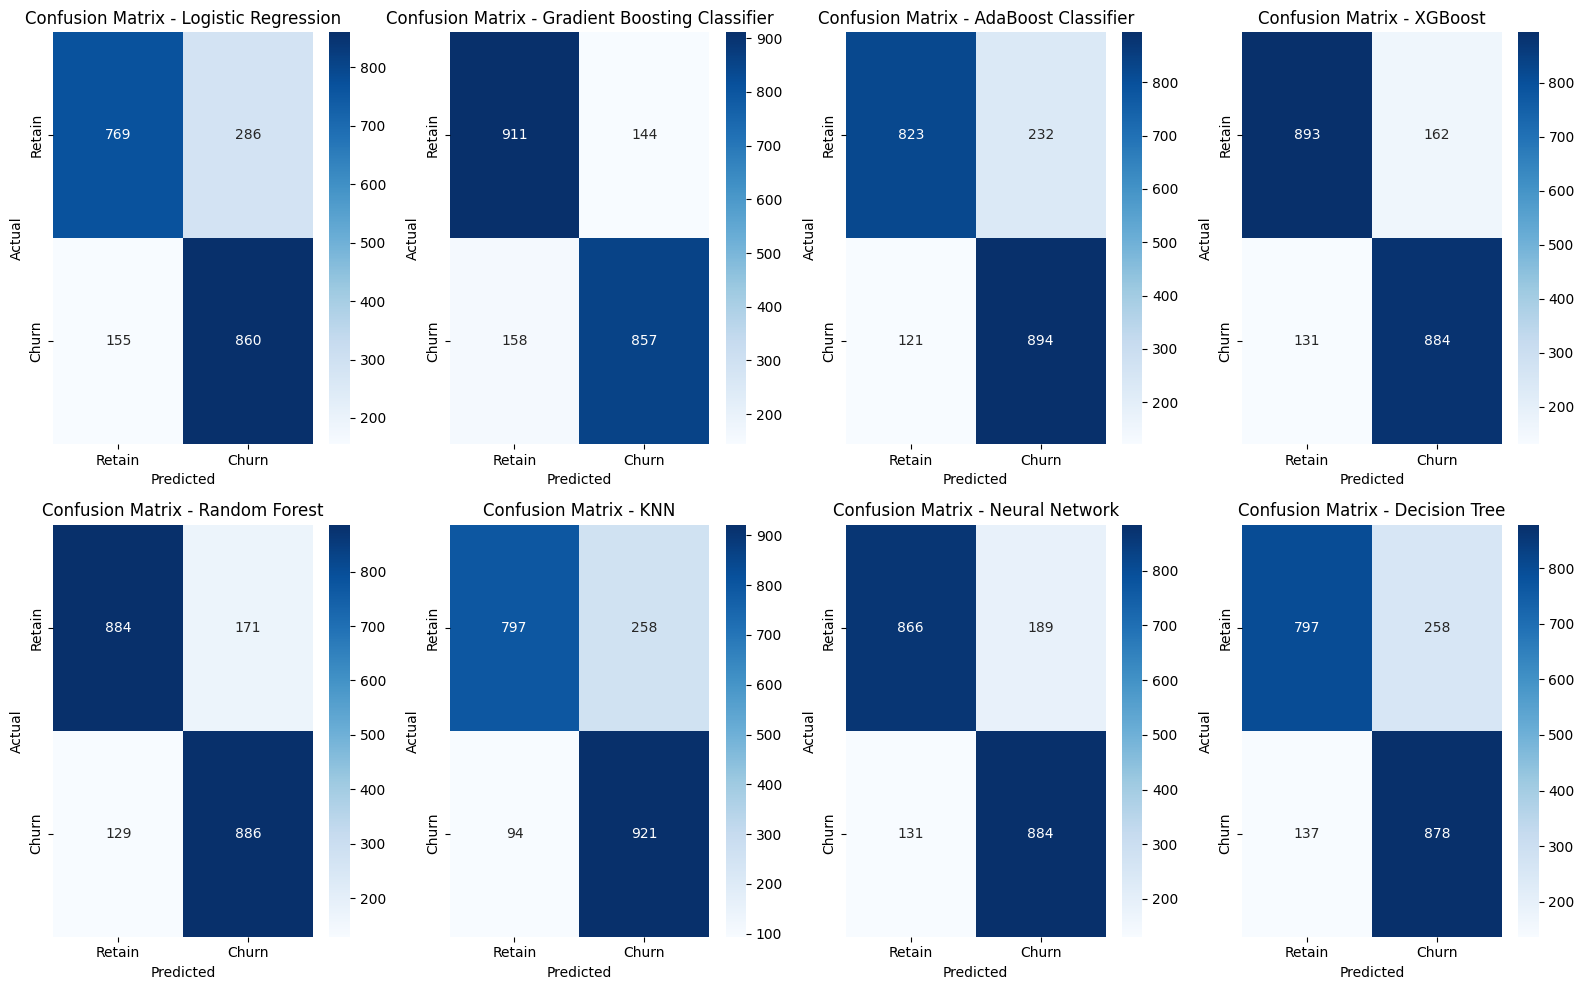

In [88]:
# Create a subplot grid
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

# Iterate over each model and plot its confusion matrix
for (model_name, (model, _)), ax in zip(best_model_sm.items(), axes.flatten()):
    model.fit(X_train_sm, y_train_sm)
    plot_confusion_matrix(model, X_test_sm, y_test_sm, model_name, ax)

plt.tight_layout()
plt.show()


# Conclusion

**Final model**<br>
Without using Smote --> As data is imbalanced , best model is decided by AUC , and the best  model without using smote is XG boost <br>
Using smote  --> We can select the model either by using f1 score, accuracy , AUC all are giving same model as best which is Gradient boosting classifier

**Recommendation**<br>
- We should pay more attention to customers who meet the criteria below
  - Contract: Month-to-month
  - Tenure: Short tenure
  - Internet service: Fiber optic
  - Payment method: Electronic check